# **Importing Necessary Libarary**
Wr are going to use:

*   Pandas for csv Analysis
*   Numpy for Arrays
*   Seaborn for some plots
*   Matplotlib.pyplot for some plots
*   datetime for Date-Time Analysis





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.widgets import Slider

# **Reading csv and Extracting Features**
We are reading csv in this block using pandas.
Features we are extracting

*   First Dates of each month of each year
*   Monthly Highiest and Lowest each month of each year



In [ ]:
# Reading data from csv
data_csv = pd.read_csv('TITAN.csv')
# Containg all unique years
dt = [2000]
# current year which is processing
year_latest_added = 2000
month_latest_added = 0
# Contains all the firit dates of a year
first_dates = ['2000-01-03']
# Array for Monthly High Each year
Monthly_High_Array = np.empty((0, 12), float)
# Array for Monthly Low Each year
Monthly_Low_Array = np.empty((0, 12), float)
Yearly_Data_Array = np.empty((0, 12), float)
Yearly_Data = []
# Extracting all 12 months high data on a particular year
Monthly_High = []
# Extracting all 12 months low data on a particular year
Monthly_Low = []
# To get highest and lowest of each day data
High_Till_Now = 0
Low_Till_Now = data_csv['Low'][0]
# To inialize Low_Till_Now value with topmost value
index = 0
# For each date in data
for data in data_csv['Date']:
  # Extracting High for that month
  if High_Till_Now < data_csv['High'][index]:
    High_Till_Now = data_csv['High'][index]
  # Extracting Low for that month
  if Low_Till_Now > data_csv['Low'][index]:
    Low_Till_Now = data_csv['Low'][index]
  # Extracting year from the data
  _year = datetime.strptime(data, '%Y-%m-%d').year
  _month = datetime.strptime(data, '%Y-%m-%d').month
  # If that year is not already processed
  if _year != year_latest_added:
    # Appending respective year and date to respective list
    dt.append(_year)
    first_dates.append(data)
    # Changing to year processed
    year_latest_added = _year
    # Appending all months high records to numpy array
    Monthly_High_Array = np.append(Monthly_High_Array, np.array([Monthly_High]), axis = 0)
    # Appending all months low records to numpy array
    Monthly_Low_Array = np.append(Monthly_Low_Array, np.array([Monthly_Low]), axis = 0)
    # Clear Lists
    Monthly_High.clear()
    Monthly_Low.clear()
  # If month is not processed for this particular year
  if _month != month_latest_added:
    # Appending after each month ends
    Monthly_High.append(High_Till_Now)
    Monthly_Low.append(Low_Till_Now)
    # Reseting High_Till_Now and Low_Till_Now value of data
    High_Till_Now = 0
    try:
      Low_Till_Now = data_csv['Low'][index + 1]
    except:
      continue
    # Add month to latest processed
    month_latest_added = _month
  # Increasing index for use in Low_Till_Now
  index = index + 1
# Droppin last three columns of NaN value
data_csv.drop(['Trades', 'Deliverable Volume', '%Deliverble'], axis = 1, inplace = True)
# Showing first 5 data
data_csv.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,TITAN,EQ,144.95,146.0,156.45,146.0,155.00,155.70,154.36,23000,3.550370e+11
1,2000-01-04,TITAN,EQ,155.70,152.0,152.00,144.0,148.05,147.40,146.72,26300,3.858700e+11
2,2000-01-05,TITAN,EQ,147.40,144.0,148.80,136.0,139.95,138.40,142.95,20600,2.944850e+11
3,2000-01-06,TITAN,EQ,138.40,142.0,149.50,141.0,149.50,149.50,147.87,31600,4.672750e+11
4,2000-01-07,TITAN,EQ,149.50,149.5,153.00,145.0,147.75,146.35,148.63,36600,5.439965e+11


# **Descriptive Analysis**
Extracing descriptive features like count, mean, std, min, max, etc

In [ ]:
# Extract main features of the data
descriptive_stats = data_csv.describe()
# Showing all the features
descriptive_stats

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.792000e+03,4792.000000
mean,709.230692,709.989926,723.312816,696.430767,709.449114,709.484499,710.415443,1.172596e+06,7.796053e+13,47241.859935,4.408763e+05,0.367944
std,785.170900,785.435092,799.085424,772.183889,784.995523,785.206121,786.266584,1.763858e+06,1.378542e+14,43331.439701,7.022005e+05,0.164969
min,27.500000,27.000000,28.800000,27.000000,27.750000,27.500000,27.880000,2.000000e+02,8.125000e+08,993.000000,3.600000e+02,0.023600
25%,192.262500,192.625000,198.800000,189.500000,192.837500,193.412500,194.245000,9.867325e+04,4.299007e+12,18126.500000,4.992600e+04,0.249000
50%,396.150000,398.250000,404.525000,391.125000,397.025000,396.350000,398.095000,5.491360e+05,2.785515e+13,35076.500000,2.012115e+05,0.352400
75%,1017.725000,1018.925000,1046.500000,991.187500,1020.000000,1019.000000,1016.790000,1.630698e+06,8.382494e+13,63520.250000,6.247118e+05,0.472900
max,4714.600000,4730.000000,4754.950000,4559.900000,4734.000000,4714.600000,4647.540000,3.327661e+07,2.451345e+15,536406.000000,2.169911e+07,1.000000


In [ ]:
# Find Moving avarages for 30 days
data_csv['SMA_30'] = data_csv['Close'].rolling(window = 30).mean()
# Find Moving avarages for 100 days
data_csv['SMA_100'] = data_csv['Close'].rolling(window = 100).mean()

# A small model for buy and selling prediction (Not Realiable but)
buy_sell = 2
buy_stock = []
sell_stock = []
for i in range(len(data_csv)):
  if data_csv['SMA_30'].iloc[i] > data_csv['SMA_100'].iloc[i] and buy_sell == 2:
    buy_stock.append(data_csv['Close'].iloc[i])
    sell_stock.append(float('nan'))
    buy_sell = 1
  elif data_csv['SMA_30'].iloc[i] < data_csv['SMA_100'].iloc[i] and buy_sell == 1:
    sell_stock.append(data_csv['Close'].iloc[i])
    buy_stock.append(float('nan'))
    buy_sell = 2
  else:
    sell_stock.append(float('nan'))
    buy_stock.append(float('nan'))

data_csv['Buy'] = buy_stock
data_csv['Sell'] = sell_stock

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
            Date Symbol Series  Prev Close    Open     High      Low     Last  \
0     2000-01-03  TITAN     EQ      144.95   146.0   156.45   146.00   155.00   
1     2000-01-04  TITAN     EQ      155.70   152.0   152.00   144.00   148.05   
2     2000-01-05  TITAN     EQ      147.40   144.0   148.80   136.00   139.95   
3     2000-01-06  TITAN     EQ      138.40   142.0   149.50   141.00   149.50   
4     2000-01-07  TITAN     EQ      149.50   149.5   153.00   145.00   147.75   
...          ...    ...    ...         ...     ...      ...      ...      ...   
5301  2021-04-26  TITAN     EQ     1461.45  1470.0  1489.75  1465.15  1478.95   
5302  2021-04-27  TITAN     EQ     1479.85  1485.0  1503.55  1482.00  1498.00   
5303  2021-04-28  TITAN     EQ     1495.10  1505.0  1514.90  1491.70  1509.00   
5304  2021-04-29  TITAN     EQ     1508.85  1524.0  1527.50  1497.00  1504.35   
5305  2021-04-30  TITAN     EQ     1506.80  1500.0  1516.

# **Line Plots for Open, High, Low, Close**
Ploting these plots using seaborn

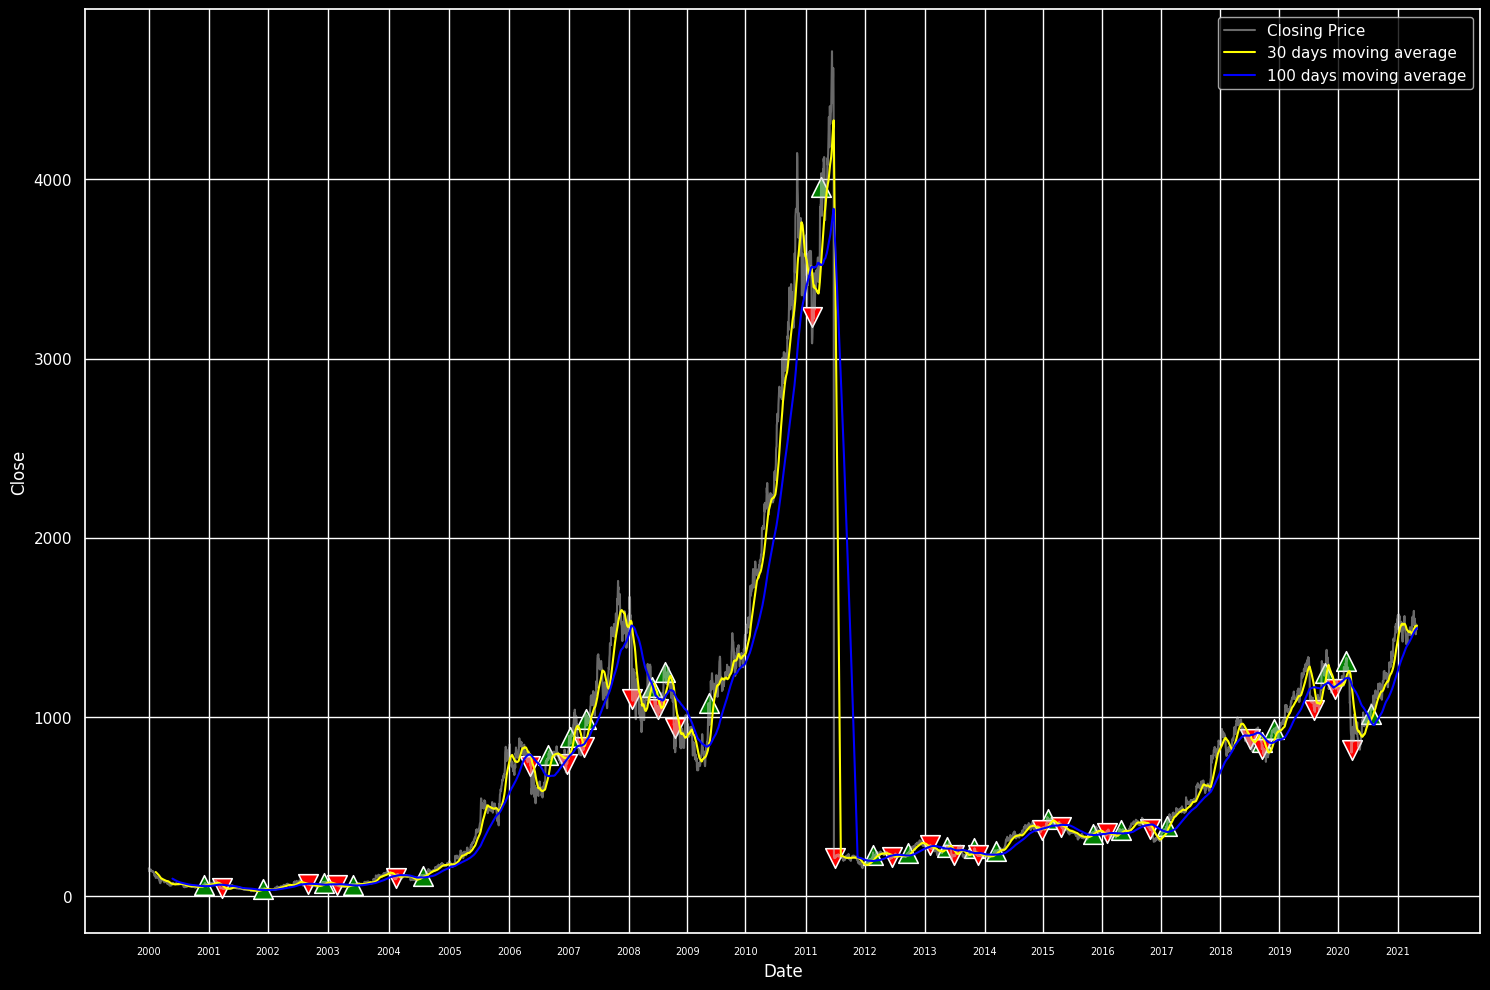

In [ ]:
# Assigning dark theme
plt.style.use('dark_background')
# Setting figure size for subplots
plt.figure(figsize=(18,12))
# Ploting with needed x and y
ax = sns.lineplot(data_csv, x = 'Date', y ='Close', color = 'lightgray', alpha=0.5, label = 'Closing Price')
sns.lineplot(data_csv, x = 'Date', y ='SMA_30', color = 'yellow', label = '30 days moving average')
sns.lineplot(data_csv, x = 'Date', y ='SMA_100', color = 'blue', label = '100 days moving average')
sns.scatterplot(data_csv, x = 'Date', y = 'Buy', marker = '^', color = 'green', s=200)
sns.scatterplot(data_csv, x = 'Date', y = 'Sell', marker = 'v', color = 'red', s=200)
ax.legend()
# Setting x-ticks to only start dates
ax.set_xticks(first_dates)
# Changing labels to years
ax.set_xticklabels(dt, size = 7)
#Showing the plot
plt.show()

# **Ploting Japanese Candlestick Plots**
In the section we are ploting japanese candle stick plots using three box plot with the help of matplotlib by combining three box plots for candle stick

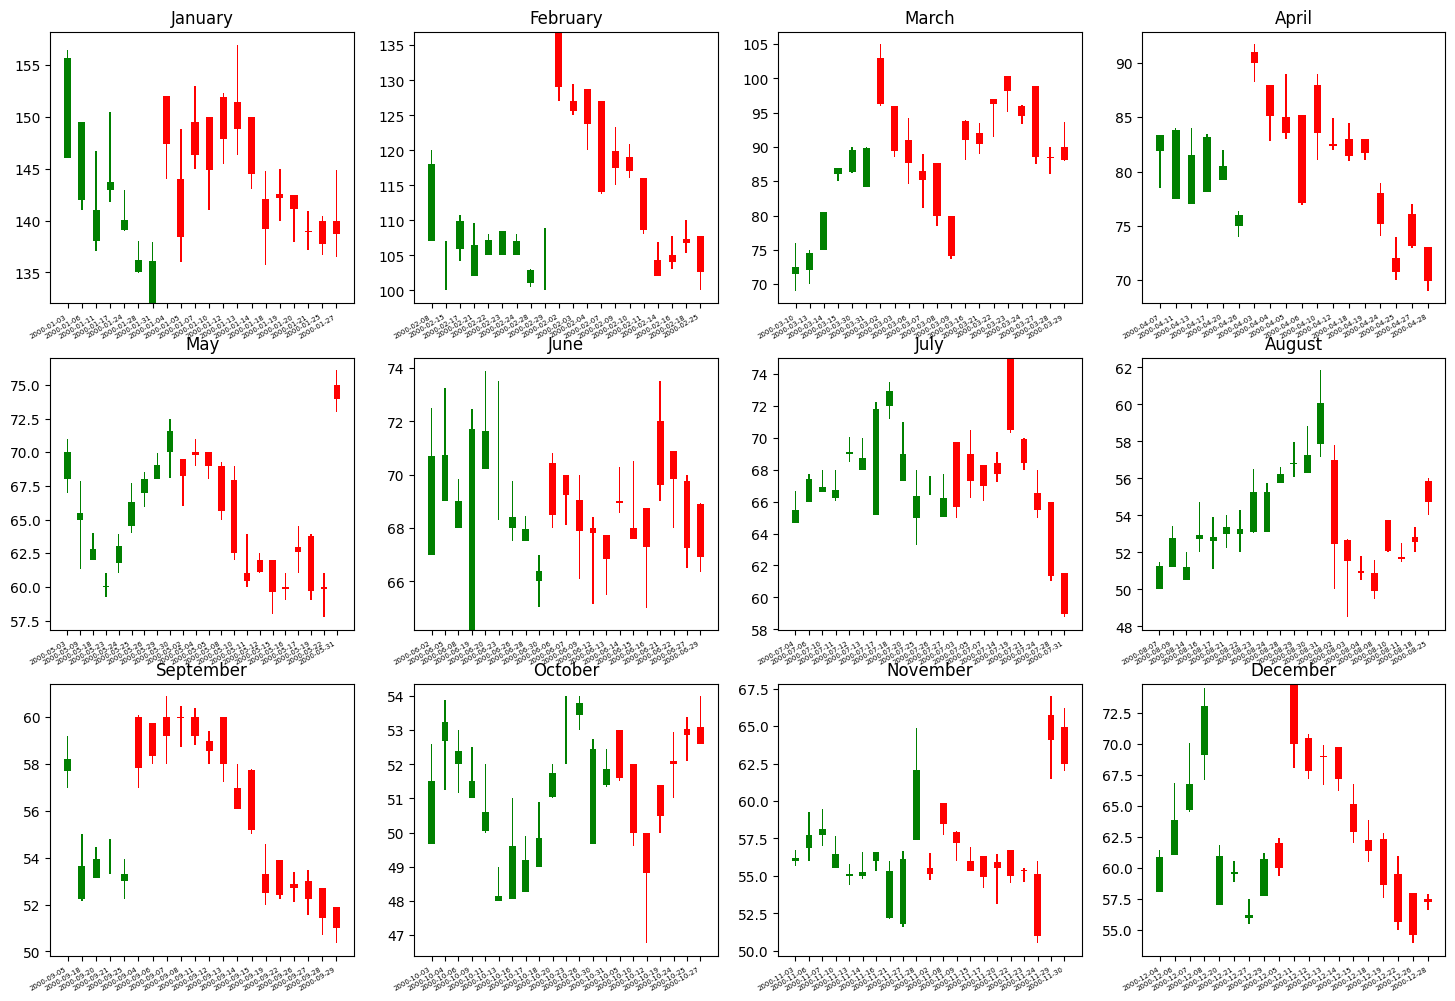

In [ ]:
# Converting Date column to datetime of python
data_csv.loc['Date'] = pd.to_datetime(data_csv['Date'], format='%Y-%m-%d')
# Months to print as Title
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Setting figure size for subplots
plt.figure(figsize = (18, 12))
# For 12 months
for i in range(0, 12):
  # From Jan to Dec
  Month_Data = data_csv[(data_csv['Date'] > '2000-' + str('0' if (i+1) < 10 else '') + str(i+1) + '-01') & (data_csv['Date'] < '2000-' + str('0' if (i+2) < 10 else '') + str(i+2) + '-01')]
  # If Increasing
  Up_Stick = Month_Data[(Month_Data['Close'] >= Month_Data['Open'])]
  # If Decreasing
  Down_Stick = Month_Data [Month_Data['Close'] < Month_Data['Open']]
  # Subplot Numbers
  plt.subplot(3, 4, i + 1)
  # Ploting Postive Data with green
  plt.bar(Up_Stick['Date'], (Up_Stick['Close'] - Up_Stick['Open']), .5, bottom = Up_Stick['Open'], color = 'green')
  plt.bar(Up_Stick['Date'], (Up_Stick['High'] - Up_Stick['Close']), .1, bottom = Up_Stick['Close'], color = 'green')
  plt.bar(Up_Stick['Date'], (Up_Stick['Low'] - Up_Stick['Open']), .1, bottom = Up_Stick['Open'], color = 'green')
  # Ploting Negative Data with red
  plt.bar(Down_Stick['Date'], (Down_Stick['Close'] - Down_Stick['Open']), .5, bottom = Down_Stick['Open'], color = 'red')
  plt.bar(Down_Stick['Date'], (Down_Stick['High'] - Down_Stick['Open']), .1, bottom = Down_Stick['Open'], color = 'red')
  plt.bar(Down_Stick['Date'], (Down_Stick['Low'] - Down_Stick['Close']), .1, bottom = Down_Stick['Close'], color = 'red')
  # Setting font size and rotation of ticks
  plt.xticks(rotation = 30, ha = 'right', size = 5)
  # Setting Up Titles
  plt.title(months[i])
# Ploting the plots
plt.show()

# **Japanese Candlesticks using Plotly**
In this section, we have ploted Japanese candlesticks using plotly library which gives very user freindly plots like shown below. Each plot consists of three months records.

In [ ]:
# For Plotly Plots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Converting date data to datetime for extracting date, month and year
data_csv["Date"] = pd.to_datetime(data_csv["Date"])
data_csv["Month"] = data_csv["Date"].dt.month
data_csv["Year"] = data_csv["Date"].dt.year
data_csv["Day"] = data_csv["Date"].dt.day

j = -2

# For ploting whole year
for i in range(0, 4):

  # Extracting 3 months data a single time
  data_2000 = data_csv[data_csv["Year"] == 2000][(data_csv["Month"] > i * 3) & (data_csv["Month"] <= (i+1) * 3)]

  # Create subplots and mention plot grid size
  fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                vertical_spacing=0.09, subplot_titles=("TITAN",'Volume'),
                row_width=[0.2, 0.7])

  # Plot stock on 1st row
  fig.add_trace(go.Candlestick(x = data_2000["Date"], open = data_2000["Open"], high = data_2000["High"],
                  low = data_2000["Low"], close = data_2000["Close"], name = "Tata"),
                  row = 1, col = 1
  )
  # Setting Volume color
  colors = []
  for j in range(j + 2, j + 2+ len(data_2000)-1):
    if data_2000['Open'][j] > data_2000['Close'][j]:
        colors.append('red')
    else:
        colors.append('Green')


  # Bar trace for volumes on 2nd row without legend
  fig.add_trace(go.Bar(x=data_2000['Date'], y=data_2000['Volume'], showlegend=False,marker_color=colors), row=2, col=1)

  # Removing no trading days
  fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), #hide weekends
        dict(values=["2015-12-25", "2016-01-01"]),  # hide Christmas and New Year's
    ]
  )

  # Do not show OHLC's rangeslider plot
  fig.update(layout_xaxis_rangeslider_visible=False)
  # Showing plot
  fig.show()


<ipython-input-45-b794a2f954b9>:17: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

